# Section 9: Python for Data Visualization - Seaborn 

# 01 - Introduction and Distribution Plots 

In [1]:
### INTRODUCTION 
# -Seaborn is a statistical plotting library -> Built on top of matplotlib - matplotlib knowledge will be useful
# -It has beautiful default styles 
# -Designed to work really well with the pandas Data Frame objects. 

## Install with - conda install seaborn

In [2]:
## DISTRIBUTION PLOTS 

# -We are going to discuss several plot types with seaborn that allows us to visualize the distribution of our 
#  data set.

##Importing seaborn 
import seaborn as sns ##By convention we import seaborn as sns 

%matplotlib inline 

In [3]:
##Seaborn has some built-in datasets that we can directly load
tips = sns.load_dataset('tips') 

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


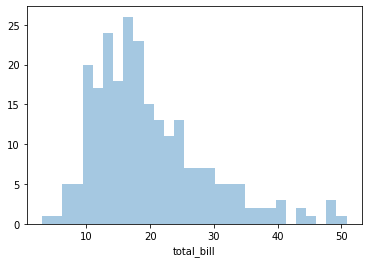

In [8]:
## A- Distribution plots - Allows us to plot the distribution of a univariate (one variable ) set of observations

sns.distplot(tips['total_bill'], kde = False, bins = 30) 
                                 ## Returns a histrogram with a KDE - (Kernel Density Estimation) 
                                 ## We can remove the KDE by adding the parameter kde = False    
                                 ## To obtain more info from our dataset we can change the number of bins
                                 ## We do so by passing a bins value 

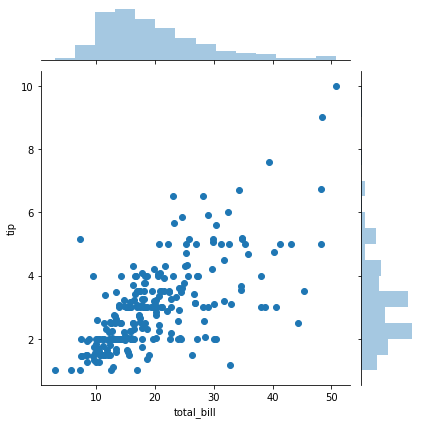

In [9]:
## B - Joint plots -> Allows you to match two dist plots for bivariate data (two variables) 
##                 -> Combines two distribution plots 
                                                          ## Parameters:               
sns.jointplot(x = 'total_bill' , y = 'tip' , data = tips) ## x and y are columns of our Data Frame 
                                                          ## data is the Data Frame we are currently using 
                                                          ## kind = Allows you to affect the plot in the middle   

## The scatterplot in the middle shows a trend -> Tips are proportional to a total bill

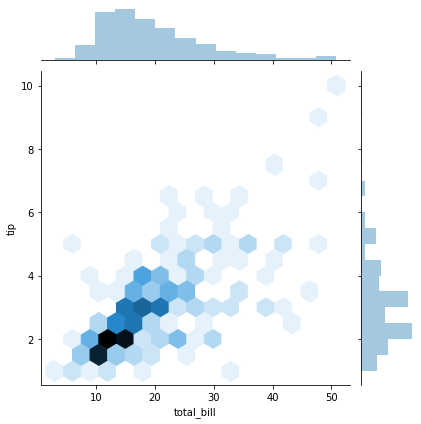

In [10]:
sns.jointplot(x = 'total_bill' , y = 'tip' , data = tips, kind = 'hex') ## Kind default to scatter 

                                                    ## Hex allows you to make a hexagon distribution representation.
                                                    ## More points -> Dark hexagon, Less points -> Lighter hexagon

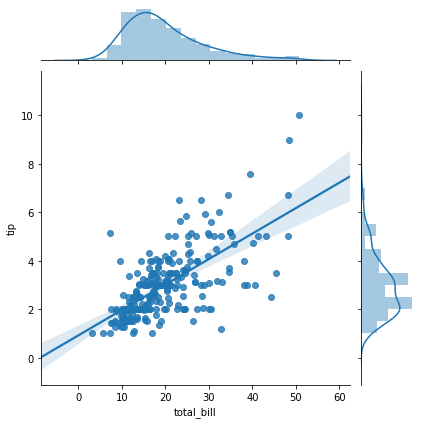

In [11]:
sns.jointplot(x = 'total_bill' , y = 'tip' , data = tips, kind = 'reg') ## A linear regressor 

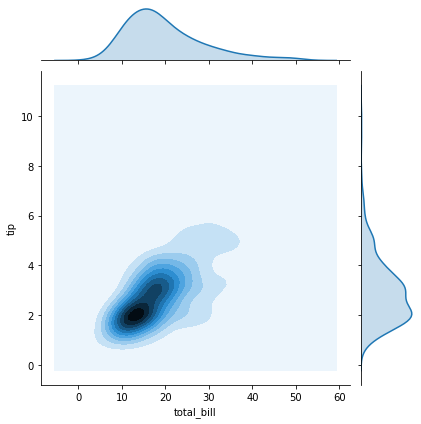

In [12]:
sns.jointplot(x = 'total_bill' , y = 'tip' , data = tips, kind = 'kde') 
                                          ## KDE -> Shows where the Density of where the points match up the most.

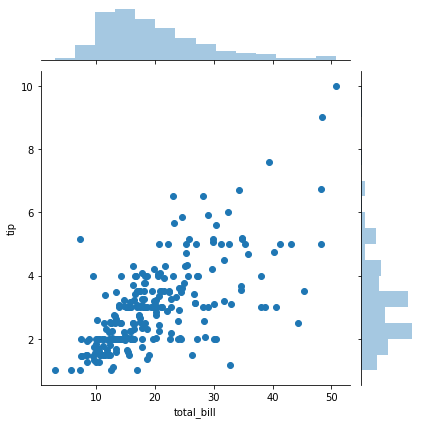

In [13]:
### Usually we will be using the default scatterplot as the center plot 
sns.jointplot(x = 'total_bill' , y = 'tip' , data = tips)

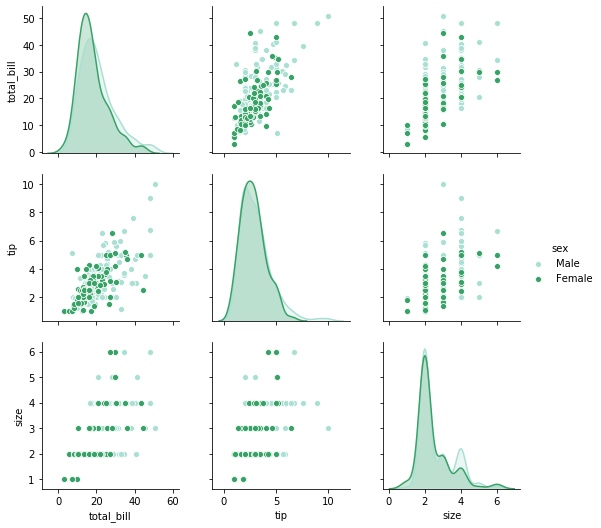

In [21]:
### Lets explore this idea by using pairplot()

## C -pairplot ->  Plots pairwise relationships across an entire dataFrame (numerical columns) and also supports a 
##                 colorhue argument for categorical plots 

sns.pairplot(tips, hue = 'sex', palette = 'BuGn') 
                   ## pairplot does what jointplot does for every possible combination of the numerical columns in
                   ## the Data Frame -> This will take a while for large Data Frames. 
    
                   ## Notice that the diagonal plots output a histogram of the corresponding column since we would
                   ## obtain a straight line if we plotted a variable against itself. Instead a distribution plot is
                   ## output. 
                
                   ## We can add a hue argument -> Pass in a categorical value/ column, e.g. sex, smokes?
                   ## We can also add a color palette argument -> color map strings!

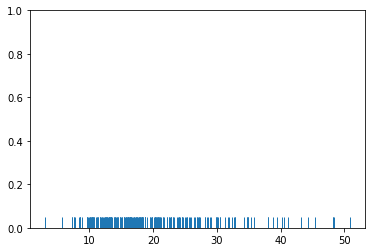

In [22]:
### D - Rugplots -> We will use to explain the concept of a KDE as we saw before 

sns.rugplot(tips['total_bill']) 
                                ## Draws a dash mark for every point in this univariate distribution. 
                                ## A rugplot outputs the dashes themselves -> Related to a rugplot 

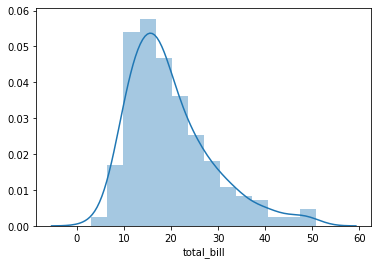

In [26]:
sns.distplot(tips['total_bill']) ## A histogram has bins and counts how many dashes are in that bin.
                                              ## The plot outputs the number of dashes as a bar           

(0, 1)

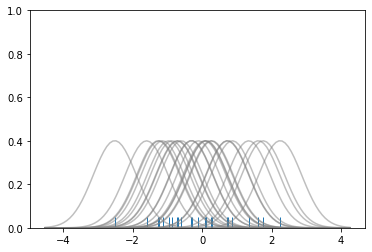

In [27]:
## E - KDE plots stand for Kernel Density Estimation plots 

## Consider the following example: (From the notebook)

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

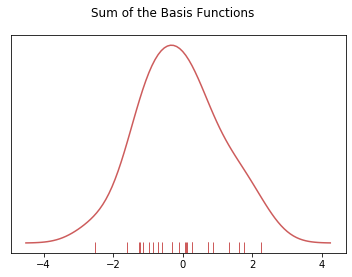

In [30]:
###We add them all up to get the kernel density bassis function 

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")